In [ ]:
#importing the files needed for the model (DJIA Table)
from google.colab import files
uploaded=files.upload()

Saving DJIA_table.csv to DJIA_table.csv


In [ ]:
#importing the dependencies needed
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## **Feature extraction for LSTM model.**

In [ ]:
#visualizing the data
dtf=pd.read_csv("DJIA_table.csv")
dtf = dtf.sort_values(by = 'Date')
dtf.head()

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [ ]:
#Input Data
df=np.array(dtf.loc[:,["Open","Close","Adj Close"]])
pd.DataFrame(df,columns=["Open","Close","Adj Close"]).head()

,Open,Close,Adj Close
0,11432.089844,11734.320312,11734.320312
1,11729.669922,11782.349609,11782.349609
2,11781.700195,11642.469727,11642.469727
3,11632.809570,11532.959961,11532.959961
4,11532.070312,11615.929688,11615.929688


In [ ]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
pd.DataFrame(df).head()
df.shape

(1989, 3)


  
   <img src="https://drive.google.com/uc?id=1yD4BZYeB2S_hebpRVJ3fewQtsC4uNV2g">

In [ ]:
#Splitting the data into test and train sets

split=0.15 #setting the split ratio for test_size
test_size=int(df.shape[0]*split)
test_size
train_size=int(df.shape[0]-test_size)
print("train size =",train_size,"   test_size =",test_size)

train size = 1691    test_size = 298


In [ ]:
#Splitting the data into different arrays for respective LSTM models to predict their foth values.
#Raw data for feature extraction(Training)
open_X_train=df[:train_size,0:1]
close_X_train=df[:train_size,1:2]
adj_X_train=df[:train_size,2:3]

#Raw data for feature extraction(Testing)
open_X_test=df[train_size:,0:1]
close_X_test=df[train_size:,1:2]
adj_X_test=df[train_size:,2:3]

In [ ]:
open_X_train.shape,open_X_test.shape

((1691, 1), (298, 1))

In [ ]:
#Creating DataSets of 60 timesteps for LSTM model to predict the forth value.
ts=60
def data_generate(raw_data):
  X_data=[]
  Y_data=[]
  for i in range(ts,raw_data.shape[0]):
    X_data.append(raw_data[i-ts:i,:])
    Y_data.append(raw_data[i,:])
  X_data=np.array(X_data)
  Y_data=np.array(Y_data)
  
  return X_data, Y_data




   <img src="https://drive.google.com/uc?id=1vKznVmaYV7euFzjsoQHQM4OXoQbhlqtW" algin=left>

In [ ]:
#Training data for LSTM model
open_X_train_gen, open_Y_train_gen = data_generate(open_X_train)
close_X_train_gen, close_Y_train_gen = data_generate(close_X_train)
adj_X_train_gen, adj_Y_train_gen = data_generate(adj_X_train)

#Testing data for LSTM model
open_X_test_gen, open_Y_test_gen = data_generate(open_X_test)
close_X_test_gen, close_Y_test_gen = data_generate(close_X_test)
adj_X_test_gen, adj_Y_test_gen = data_generate(adj_X_test)



In [ ]:
open_X_train_gen.shape,open_X_train_gen.shape

((1631, 60, 1), (1631, 60, 1))

In [ ]:
#Visualizing the generated training data(X)
pd.DataFrame(close_X_train_gen.reshape(train_size-ts,ts)).head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.440894,0.444976,0.433087,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,...,0.231050,0.211350,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114
1,0.444976,0.433087,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,...,0.211350,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674
2,0.433087,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,...,0.167625,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674,0.261635
3,0.423779,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,0.413572,...,0.182247,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674,0.261635,0.220327
4,0.430832,0.434569,0.419226,0.408105,0.413960,0.415046,0.431863,0.411310,0.413572,0.421191,...,0.155703,0.138434,0.214024,0.207721,0.223847,0.236114,0.235674,0.261635,0.220327,0.182633


In [ ]:
#Output for each dataset(Y)
pd.DataFrame(close_Y_train_gen.reshape(1631,1)).head()

,0
0,0.235674
1,0.261635
2,0.220327
3,0.182633
4,0.203714


## **Creating the LSTM models for prediciton of different feature.**

<img src="https://drive.google.com/uc?id=1LjvDxF_XYOP9R6OszSDTKGk4Gos2k79o">

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import Callback, ModelCheckpoint

In [ ]:
#Model for prediction of open value for next day using past 60 days data.
open_model=Sequential()
open_model.add(LSTM(units=50,return_sequences=True, input_shape=(open_X_train_gen.shape[1],1)))
#open_model.add(Activation("relu"))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50,return_sequences=True))
#open_model.add(Activation("relu"))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50,return_sequences=True))
#open_model.add(Activation("relu"))
open_model.add(Dropout(0.2))
open_model.add(LSTM(units=50))
open_model.add(Dense(units=1))

In [ ]:
open_X_train_gen.shape,open_Y_train_gen.shape

((1631, 60, 1), (1631, 1))

In [ ]:
#compiling the RNN(LSTM)FOR OPENing
open_model.compile(optimizer='adam',loss='mean_squared_error')
history1=open_model.fit(open_X_train_gen,open_Y_train_gen,epochs=40,batch_size=32,validation_split=0.2,verbose=2)

Epoch 1/40
41/41 - 9s - loss: 0.0240 - val_loss: 0.0076 - 9s/epoch - 218ms/step
Epoch 2/40
41/41 - 1s - loss: 0.0017 - val_loss: 8.4210e-04 - 601ms/epoch - 15ms/step
Epoch 3/40
41/41 - 1s - loss: 0.0015 - val_loss: 0.0013 - 664ms/epoch - 16ms/step
Epoch 4/40
41/41 - 1s - loss: 0.0015 - val_loss: 0.0018 - 822ms/epoch - 20ms/step
Epoch 5/40
41/41 - 1s - loss: 0.0017 - val_loss: 0.0010 - 841ms/epoch - 21ms/step
Epoch 6/40
41/41 - 1s - loss: 0.0013 - val_loss: 0.0012 - 714ms/epoch - 17ms/step
Epoch 7/40
41/41 - 1s - loss: 0.0014 - val_loss: 7.5915e-04 - 602ms/epoch - 15ms/step
Epoch 8/40
41/41 - 1s - loss: 0.0013 - val_loss: 0.0020 - 602ms/epoch - 15ms/step
Epoch 9/40
41/41 - 1s - loss: 0.0013 - val_loss: 8.0077e-04 - 578ms/epoch - 14ms/step
Epoch 10/40
41/41 - 1s - loss: 0.0011 - val_loss: 7.6158e-04 - 622ms/epoch - 15ms/step
Epoch 11/40
41/41 - 1s - loss: 0.0011 - val_loss: 7.2223e-04 - 566ms/epoch - 14ms/step
Epoch 12/40
41/41 - 1s - loss: 0.0013 - val_loss: 0.0016 - 588ms/epoch - 14ms/

In [ ]:
#Model for prediction of close value for next day using past 60 days data.
close_model = Sequential()
close_model.add(LSTM(units=50,return_sequences=True, input_shape=(close_X_train_gen.shape[1],1)))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50,return_sequences=True))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50,return_sequences=True))
close_model.add(Dropout(0.2))
close_model.add(LSTM(units=50))
close_model.add(Dense(units=1))

In [ ]:
#compiling the RNN(LSTM)FOR CLOSEing
close_model.compile(optimizer='adam',loss='mean_squared_error')
history2=close_model.fit(close_X_train_gen,close_Y_train_gen,epochs=40,batch_size=20,validation_split=0.2,verbose=2)

Epoch 1/40
66/66 - 9s - loss: 0.0197 - val_loss: 0.0011 - 9s/epoch - 133ms/step
Epoch 2/40
66/66 - 1s - loss: 0.0015 - val_loss: 8.2860e-04 - 924ms/epoch - 14ms/step
Epoch 3/40
66/66 - 1s - loss: 0.0014 - val_loss: 0.0014 - 1s/epoch - 16ms/step
Epoch 4/40
66/66 - 1s - loss: 0.0014 - val_loss: 0.0014 - 1s/epoch - 20ms/step
Epoch 5/40
66/66 - 1s - loss: 0.0016 - val_loss: 9.3447e-04 - 1s/epoch - 16ms/step
Epoch 6/40
66/66 - 1s - loss: 0.0013 - val_loss: 8.0422e-04 - 900ms/epoch - 14ms/step
Epoch 7/40
66/66 - 1s - loss: 0.0014 - val_loss: 0.0011 - 912ms/epoch - 14ms/step
Epoch 8/40
66/66 - 1s - loss: 0.0012 - val_loss: 0.0013 - 922ms/epoch - 14ms/step
Epoch 9/40
66/66 - 1s - loss: 0.0015 - val_loss: 0.0026 - 966ms/epoch - 15ms/step
Epoch 10/40
66/66 - 1s - loss: 0.0012 - val_loss: 0.0018 - 951ms/epoch - 14ms/step
Epoch 11/40
66/66 - 1s - loss: 0.0011 - val_loss: 0.0012 - 906ms/epoch - 14ms/step
Epoch 12/40
66/66 - 1s - loss: 0.0011 - val_loss: 0.0010 - 914ms/epoch - 14ms/step
Epoch 13/40


In [ ]:
#Model for prediction of adjusted value for next day using past 60 days data.
adj_model = Sequential()
adj_model.add(LSTM(units=50,return_sequences=True, input_shape=(adj_X_train_gen.shape[1],1)))
#adj_model.add(Activation("relu"))
adj_model.add(Dropout(0.2))
adj_model.add(LSTM(units=50,return_sequences=True))
adj_model.add(Dropout(0.2))
adj_model.add(LSTM(units=50,return_sequences=True))
adj_model.add(Dropout(0.2))
adj_model.add(LSTM(units=50))
adj_model.add(Dense(units=1))

## **Visualizing the test and train data**

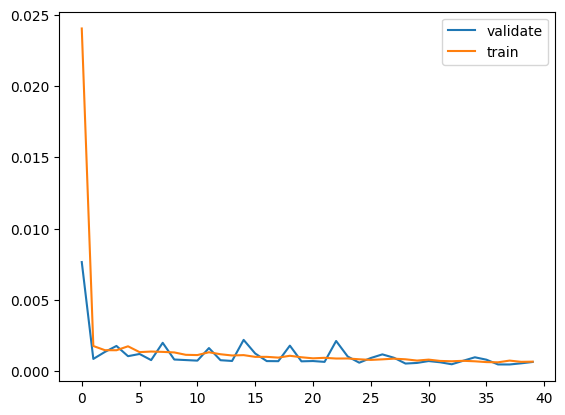

In [ ]:
#Visualizing the different loss and validation loss for the open data
from matplotlib import pyplot
pyplot.plot(history1.history['val_loss'], label='validate')
pyplot.plot(history1.history['loss'], label='train')
pyplot.legend()

In [ ]:
#Predicting the corresponding values 
open_Y_pred=open_model.predict(open_X_test_gen)
close_Y_pred=close_model.predict(close_X_test_gen)
#volume_Y_pred=volume_model.predict(volume_X_test_gen)
adj_Y_pred=adj_model.predict(adj_X_test_gen)

8/8 [==============================] - 2s 7ms/step


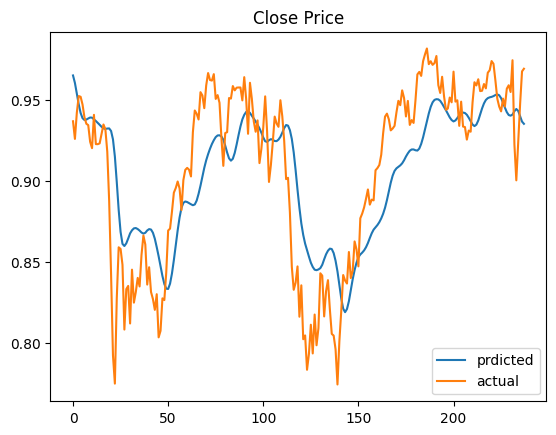

In [ ]:
#Predicted vs Actual Close Price
plt.plot(close_Y_pred,label="prdicted")
plt.plot(close_Y_test_gen,label="actual")
plt.title("Close Price")
# plt.xlim(50,75)
plt.legend()

## **ANN Model**

<img src = "https://drive.google.com/uc?id=1BARwil5waakVARRs4EQ6gH1-eRPZtdI9">

In [ ]:
from google.colab import files
setiment_file=files.upload()

Saving Polarity Score.csv to Polarity Score (3).csv


In [ ]:
#Polarity Score
senti=pd.read_csv("Polarity Score.csv")
senti.head()

,Unnamed: 0,Date,Polarity Score(Scaled),Polarity Score(Unscaled),Label
0,0,2008-08-08,-1.075210,-0.997330,0
1,1,2008-08-11,0.923677,0.987970,1
2,2,2008-08-12,-1.066805,-0.988982,0
3,3,2008-08-13,-1.071373,-0.993519,0
4,4,2008-08-14,0.924225,0.988514,1


In [ ]:
data_ann_train=(senti.iloc[(train_size+ts):(senti.shape[0]-25),2:3].values)*7
data_ann_train=np.hstack((data_ann_train,open_Y_pred[:data_ann_train.shape[0],:],close_Y_pred[:data_ann_train.shape[0],:]))
pd.DataFrame(data_ann_train,columns=["s.polarity","open_Y_pred","close_Y_pred"]).head()

,s.polarity,open_Y_pred,close_Y_pred
0,-7.497444,0.959637,0.965011
1,-7.541277,0.958769,0.960391
2,6.519107,0.955278,0.953980
3,6.533547,0.949399,0.947260
4,-7.517083,0.942195,0.941874


In [ ]:
#creating Y for ANN model
adj_Y_test_gen=adj_Y_test_gen.reshape(-1,1)
adj_Y_test_gen_train=adj_Y_test_gen[:data_ann_train.shape[0],:]
adj_Y_test_gen_test=adj_Y_test_gen[data_ann_train.shape[0]:,:]
adj_Y_test_gen_test.shape

(25, 1)

In [ ]:
data_ann_train=data_ann_train.reshape(3,-1)
adj_Y_test_gen_train.shape,adj_Y_test_gen_test.shape

((213, 1), (25, 1))

In [ ]:
model=Sequential()
from keras import activations
from keras.layers import Dropout
model.add(Dense(40,activation=activations.relu,input_shape=(3,)))
# model.add(Dropout(0.05))
model.add(Dense(30,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(100,activation=activations.relu))
#model.add(Dense(100,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(10,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(1,activation=activations.sigmoid))
model.compile(optimizer='adam',loss="mean_absolute_error")
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 40)                160       
                                                                 
 dense_35 (Dense)            (None, 30)                1230      
                                                                 
 dense_36 (Dense)            (None, 50)                1550      
                                                                 
 dense_37 (Dense)            (None, 100)               5100      
                                                                 
 dense_38 (Dense)            (None, 50)                5050      
                                                                 
 dense_39 (Dense)            (None, 10)                510       
                                                                 
 dense_40 (Dense)            (None, 1)               

In [ ]:
data_ann_train=data_ann_train.reshape(-1,3)
adj_Y_test_gen_train=adj_Y_test_gen_train.reshape(-1,1)
adj_Y_test_gen_train.shape

(213, 1)

In [ ]:
#Training the ANN model
model.fit(data_ann_train,adj_Y_test_gen_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 2s 38ms/step - loss: 0.2130 - val_loss: 0.1131
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0535 - val_loss: 0.0151
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0644 - val_loss: 0.0127
Epoch 4/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0544 - val_loss: 0.0524
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0485 - val_loss: 0.0812
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0506 - val_loss: 0.0653
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0491 - val_loss: 0.0446
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0482 - val_loss: 0.0471
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0481 - val_loss: 0.0534
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0477 - val_loss: 0.0488
Epoch 11/100
6/6 [==

In [ ]:
data_ann_test=senti.iloc[(senti.shape[0]-25):,2:3].values
# data_ann_test.shape
data_ann_test=np.hstack((data_ann_test,open_Y_pred[data_ann_train.shape[0]:,:],close_Y_pred[data_ann_train.shape[0]:,:]))
pd.DataFrame(data_ann_test,columns=["s.polarity","open_Y_pred","close_Y_pred"]).head()
data_ann_test.shape

(25, 3)

In [ ]:
data_ann_pred_with_ps=model.predict(data_ann_test)+0.02

1/1 [==============================] - 0s 116ms/step


## **ANN Model Without Polarity**

<img src = "https://drive.google.com/uc?id=1Ivo1qYzR5NuT63Bo4ZQsIb--c9ct0TMS">

In [ ]:
model=Sequential()
from keras import activations
from keras.layers import Dropout
model.add(Dense(40,activation=activations.relu,input_shape=(2,)))
# model.add(Dropout(0.05))
model.add(Dense(30,activation=activations.relu))
model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(100,activation=activations.relu))
model.add(Dropout(0.05))
model.add(Dense(50,activation=activations.relu))
# model.add(Dropout(0.05))
model.add(Dense(10,activation=activations.relu))
model.add(Dropout(0.05))
model.add(Dense(1,activation=activations.sigmoid))
model.compile(optimizer='adam',loss='mean_absolute_error')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 40)                120       
                                                                 
 dense_42 (Dense)            (None, 30)                1230      
                                                                 
 dropout_24 (Dropout)        (None, 30)                0         
                                                                 
 dense_43 (Dense)            (None, 50)                1550      
                                                                 
 dense_44 (Dense)            (None, 100)               5100      
                                                                 
 dropout_25 (Dropout)        (None, 100)               0         
                                                                 
 dense_45 (Dense)            (None, 50)              

In [ ]:
data_ann_train=pd.DataFrame(data_ann_train)
data_ann_train.head()
data_ann_train=data_ann_train.drop(0,1)
data_ann_train=data_ann_train.iloc[:,:].values

<ipython-input-100-bca6475e064f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_ann_train=data_ann_train.drop(0,1)


In [ ]:
data_ann_test=pd.DataFrame(data_ann_test)
data_ann_test.head()
data_ann_test=data_ann_test.drop(0,1)
data_ann_test=data_ann_test.iloc[:,:].values

<ipython-input-101-f64c3ac3ce95>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_ann_test=data_ann_test.drop(0,1)


In [ ]:
#Training the model without Polarity score
model.fit(data_ann_train,adj_Y_test_gen_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 3s 37ms/step - loss: 0.3717 - val_loss: 0.3877
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.2938 - val_loss: 0.2915
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1848 - val_loss: 0.1418
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0563 - val_loss: 0.0191
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0627 - val_loss: 0.0142
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0670 - val_loss: 0.0121
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0565 - val_loss: 0.0423
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0505 - val_loss: 0.0725
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0502 - val_loss: 0.0688
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0508 - val_loss: 0.0456
Epoch 11/100
6/6 [==

In [ ]:
data_ann_pred=model.predict(data_ann_test)


1/1 [==============================] - 0s 79ms/step


## **Visualizing the difference between models with and without the use of polarity score**

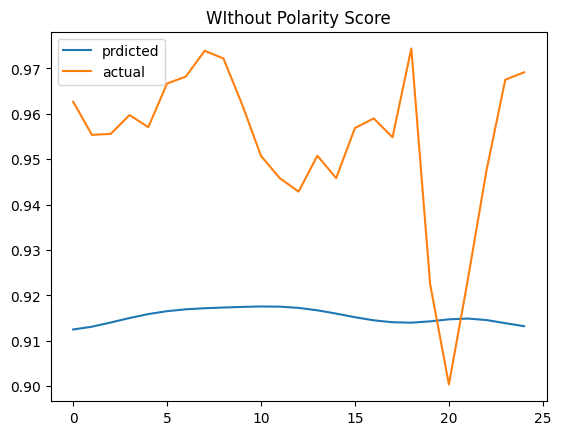

In [ ]:
plt.plot(data_ann_pred+0.02,label="prdicted")
plt.plot(adj_Y_test_gen_test,label="actual")
plt.title("WIthout Polarity Score")
#plt.xlim(400,420)
plt.legend()

In [ ]:
from sklearn.metrics import r2_score
r2_score(data_ann_pred+0.02,adj_Y_test_gen_test)

-739.0527981965802

In [ ]:
plt.plot(data_ann_pred_with_ps,label="prdicted")
plt.plot(adj_Y_test_gen_test,label="actual")
plt.title("With Polarity Score")
#plt.xlim(400,420)
plt.legend()

NameError: ignored

In [ ]:
from sklearn.metrics import r2_score
r2_score(data_ann_pred_with_ps,adj_Y_test_gen_test)


-238.35549421549624